Applying PCA on training data and test prediction with it

In [15]:
# Inspiration source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

import seaborn as sns
import pandas as pd

# load dataset into Pandas DataFrame
df = sns.load_dataset("iris")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


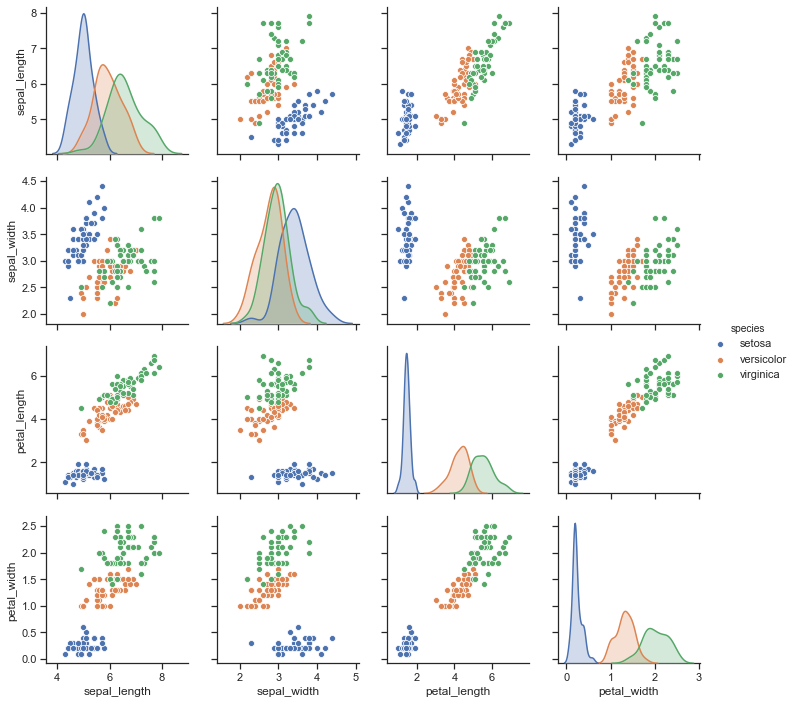

In [44]:
sns.set(style="ticks")
sns.pairplot(df, hue="species")

In [17]:
from sklearn.preprocessing import StandardScaler
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

# Separating out the features
X = df.loc[:, features].values

# Separating out the target
y = df.loc[:, [target]].values

# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = pd.DataFrame(data=y_train, columns=[target])
y_test = pd.DataFrame(data=y_test, columns=[target])

# Standardizing the features

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [18]:
from sklearn.decomposition import PCA

def do_pca(X, y_train, n_components=4):
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents,
                               columns = [f'pc_{i}' for i in range(n_components)])
    tp = pd.concat([principalDf, y_train], axis=1)
    return tp, pca

# Source PCA with n_components=2
n_components = 2
finalDf, pca = do_pca(X_train, y_train, n_components=n_components)
print(f"{n_components} components explain {100.*pca.explained_variance_ratio_.sum()}% of the information.")

2 components explain 95.16679799429029% of the information.


In [19]:
import matplotlib.pyplot as plt

def plot_components(finalDf):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 components PCA', fontsize = 20)
    targets = ['setosa', 'versicolor', 'virginica']
    colors = ['r', 'g', 'b']
    for _target, _color in zip(targets, colors):
        indicesToKeep = finalDf[target] == _target
        ax.scatter(finalDf.loc[indicesToKeep, 'pc_0']
                   , finalDf.loc[indicesToKeep, 'pc_1']
                   , c = _color
                   , s = 50)
        ax.legend(targets)
        ax.grid()

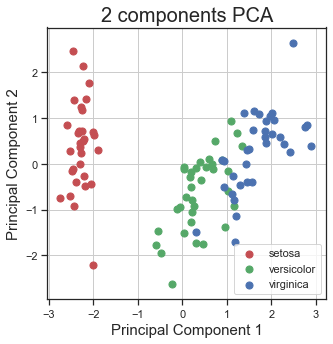

In [20]:
plot_components(finalDf)

2 components seems enough to predict target. Let's learn from the 2 components.

In [43]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train[target])
predicted = logisticRegr.predict(X_test)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy: LinearRegression", accuracy)

# With PCA result
logisticRegr = LogisticRegression(solver='lbfgs')
logisticRegr.fit(finalDf.drop(target, axis=1), y_train[target])
predicted = logisticRegr.predict(pca.transform(X_test))
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy: LinearRegression and PCA", accuracy)

from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(n_estimators = 100, n_jobs = 1, 
                             random_state = 2016,
                             class_weight='balanced',oob_score=True)

rfr.fit(X_train, y_train[target])
predicted = rfr.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy: RandomForest", accuracy)


rfr = RandomForestClassifier(n_estimators = 100, n_jobs = 1, 
                             random_state = 2016,
                             class_weight='balanced',oob_score=True)

rfr.fit(finalDf.drop(target, axis=1), y_train[target])
predicted = rfr.predict(pca.transform(X_test))
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy: PCA and RandomForest", accuracy)

c:\users\beal_m\envs\p_fraud_detection\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\beal_m\envs\p_fraud_detection\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: LinearRegression 0.9
Accuracy: LinearRegression and PCA 0.86
Accuracy: RandomForest 0.98
Accuracy: PCA and RandomForest 0.88


In [ ]:
# Trying with other components

n_components = 3
finalDf, pca = do_pca(X_train, y_train, n_components=n_components)
print(f"{n_components} components explain {100.*pca.explained_variance_ratio_.sum()}% of the information.")

import seaborn as sns
sns.pairplot(finalDf, hue=target)

In [ ]:
n_components = 4
finalDf, pca = do_pca(x, n_components=n_components)
print(f"{n_components} components explain {100.*pca.explained_variance_ratio_.sum()}% of the information.")

import seaborn as sns
sns.pairplot(finalDf, hue='target')